# Investigating U.S. Medical Insurance Costs


The goal of this project is to determine trends in U.S. Medical insurance costs based on identity markers: age, sex, bmi, children, smoking, and region. Trends will be determinded first through a graphical representation of the variables, followed by a numerical analysis (linear regression, supported vector machines)


In [192]:
# import identity class creator
# identity(data, labels, identity_marker, comparison_type, desired_value), 
# contains new_df w/ selected id & label values

import ipynb
from ipynb.fs.full.identity_class import identity

In [193]:
# function that will erase a file if it already exists, then save the file
def check_delete(filename):   
    import os
    if os.path.exists(filename):
      os.remove(filename)


In [194]:
# Data Cleaning

import pandas as pd
insurance_df = pd.read_csv('insurance.csv')
print(insurance_df.isna().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


The average insurance cost for all individuals is $13270.42 ± 12110.01, while the median cost is $9382.03


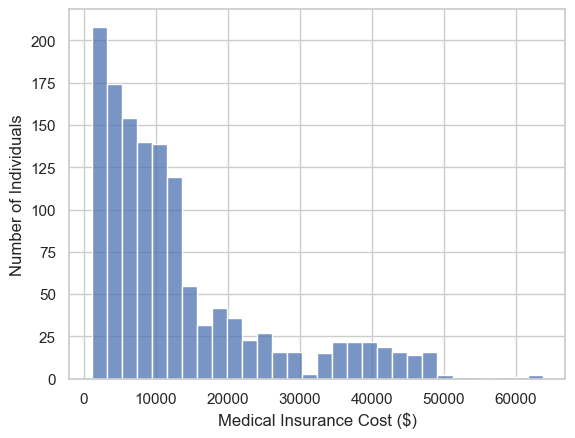

In [195]:
# Summary View
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')

avg = round(insurance_df.charges.mean(), 2)
std_dev = round(insurance_df.charges.std(),2)
median = round(insurance_df.charges.median(),2)

print("The average insurance cost for all individuals is ${} \u00B1 {}, while the median cost is ${}".format(avg,std_dev,median))
plot = sns.histplot(x='charges',data=insurance_df)
plot.set(xlabel = 'Medical Insurance Cost ($)', ylabel = 'Number of Individuals')
plt.show()

## Exploratory Analysis

### Quantitative Correlations 

In [196]:
quant_df = insurance_df[['age','bmi','charges']]
print(quant_df.describe())
print('\n')
print(quant_df.corr())

# Age is more highly correlated to charges than BMI (though both are weak positives)

               age          bmi       charges
count  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397  13270.422265
std      14.049960     6.098187  12110.011237
min      18.000000    15.960000   1121.873900
25%      27.000000    26.296250   4740.287150
50%      39.000000    30.400000   9382.033000
75%      51.000000    34.693750  16639.912515
max      64.000000    53.130000  63770.428010


              age       bmi   charges
age      1.000000  0.109272  0.299008
bmi      0.109272  1.000000  0.198341
charges  0.299008  0.198341  1.000000


### Categorical Correlations

In [197]:
# Gender (M/F)
insurance_df['gender'] = insurance_df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis =1)
gender_df = insurance_df[['gender','charges']]
print(gender_df.corr())

# There is no strong correlation between gender and increased medical charges

           gender   charges
gender   1.000000 -0.057292
charges -0.057292  1.000000


In [198]:
# Parents
insurance_df['parent'] = insurance_df.apply(lambda row: 1 if row['children']>0 else 0, axis =1)
parent_df = insurance_df[['parent','charges']]
print(parent_df.corr())

# There is no strong correlation between having children and increased medical charges

          parent  charges
parent   1.00000  0.06476
charges  0.06476  1.00000


In [199]:
# Smokers
insurance_df['smoker_code'] = insurance_df.apply(lambda row: 1 if row['smoker'] == 'yes' else 0, axis =1)
smoker_df = insurance_df[['smoker_code','charges']]
print(smoker_df.corr())

# There is a strong positive correlaton between smoking and medical charges

             smoker_code   charges
smoker_code     1.000000  0.787251
charges         0.787251  1.000000


In [200]:
# Region
reg_df = insurance_df[['charges','region']]
dummy_regions = pd.get_dummies(data = reg_df, columns = ['region'])
print(dummy_regions.corr())

# There is no strong correlation between region and medical charges

                   charges  region_northeast  region_northwest  \
charges           1.000000          0.006349         -0.039905   
region_northeast  0.006349          1.000000         -0.320177   
region_northwest -0.039905         -0.320177          1.000000   
region_southeast  0.073982         -0.345561         -0.346265   
region_southwest -0.043210         -0.320177         -0.320829   

                  region_southeast  region_southwest  
charges                   0.073982         -0.043210  
region_northeast         -0.345561         -0.320177  
region_northwest         -0.346265         -0.320829  
region_southeast          1.000000         -0.346265  
region_southwest         -0.346265          1.000000  


### Conclusion from Correlation Analyses:

After examining the correlation coeeficient for the quantitative and categorical factors, it is clear that smoking is most positively correlated (0.787) followed by age (0.300) and bmi (0.199). These factors will be examined first as single variable analyses, followed by multivariable analyses.


## Single Variable Analyses

The average charges for ages within a range of [17, 61] is 12701.75 ± 11933.85, 
while the median charges is 8606.22


The average charges for ages greater than 60 is 21063.16 ± 11875.96, 
while the median charges is 14394.56


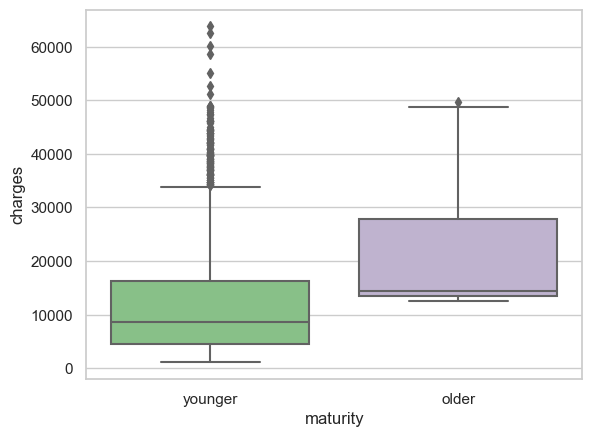

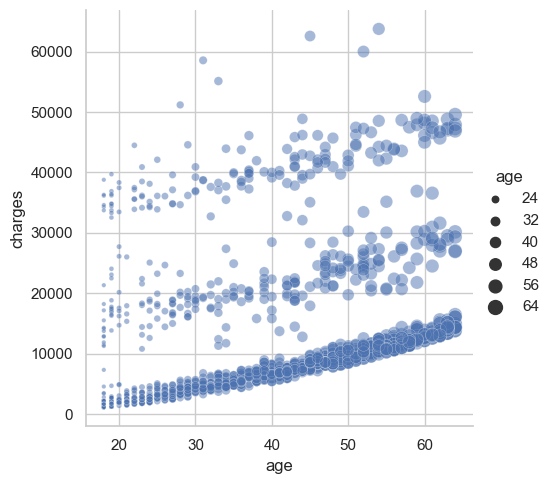

In [201]:
# Age
data = 'insurance.csv'
label = 'charges'

working_ages = identity(data, label, 'age', 'within range', [17,61])
working_ages_df = working_ages.new_df
working_ages.stat_readout()

print('\n')
retired_ages = identity(data, label, 'age', 'greater than', 60)
retired_ages_df = retired_ages.new_df
retired_ages.stat_readout()




working_ages_df['maturity'] = 'younger'
retired_ages_df['maturity'] = 'older'

maturity_df = pd.concat([working_ages_df, retired_ages_df])
sns.boxplot(x='maturity', y='charges', data=maturity_df, palette = 'Accent')

sns.relplot(x='age', y='charges', data=insurance_df, sizes = (10,100),size = 'age', palette = 'Accent', alpha = 0.5)
plt.show()

The average charges for bmis within a range of [18.5, 25] is 10434.53 ± 7512.85, 
while the median charges is 8604.15


The average charges for bmis lesser than 18.5 is 8852.2 ± 7735.04, 
while the median charges is 6759.26


The average charges for bmis greater than 25 is 13946.48 ± 12834.73, 
while the median charges is 9563.03


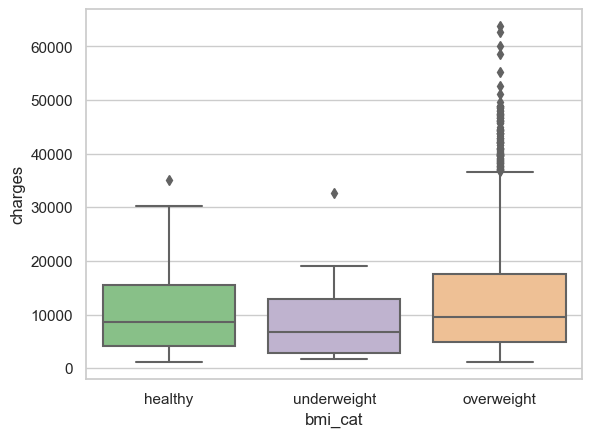

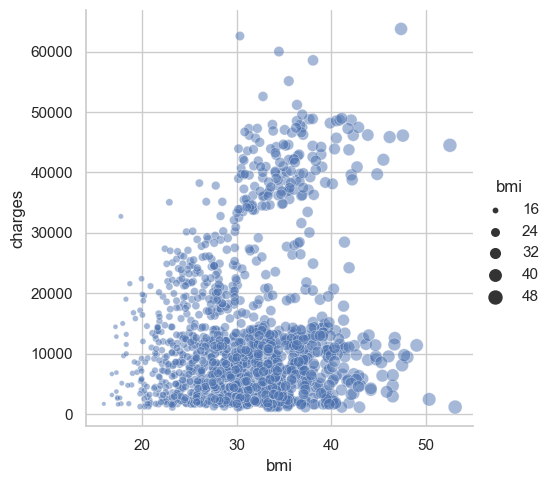

In [202]:
# BMI

# "healthy" bmi values range from 18.5 to 25 (though this study acknowledges that bmi is just one measure of
# an individual's health)

healthy_bmis = identity(data, label, 'bmi', 'within range', [18.5, 25])
healthy_bmis.stat_readout()

print('\n')
under_bmis = identity(data, label, 'bmi', 'lesser than', 18.5)
under_bmis.stat_readout()

print('\n')
over_bmis = identity(data, label, 'bmi', 'greater than', 25)
over_bmis.stat_readout()


# Create new data frame with bmi category titles for grouped boxplot
healthy_df = healthy_bmis.new_df
healthy_df['bmi_cat'] = 'healthy'

under_df = under_bmis.new_df
under_df['bmi_cat'] = 'underweight'

over_df = over_bmis.new_df
over_df['bmi_cat'] = 'overweight'


bmi_df = pd.concat([healthy_df, under_df, over_df]).reset_index()

sns.boxplot(x='bmi_cat', y='charges', data=bmi_df, palette = 'Accent')


sns.relplot(x='bmi', y='charges', data=insurance_df, sizes = (10,100),size = 'bmi', palette = 'Accent', alpha = 0.5)
plt.show()

insurance_df['bmi_cat'] = bmi_df.bmi_cat


<AxesSubplot:xlabel='smoker', ylabel='charges'>

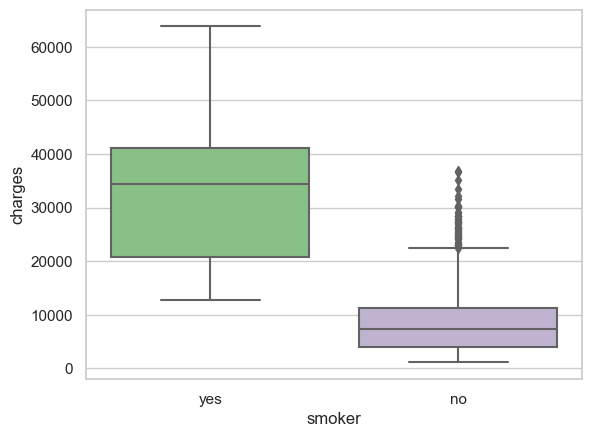

In [203]:
# Smoking

sns.boxplot(x='smoker',y = 'charges', data=insurance_df, palette = 'Accent')


## Multivariable Analyses

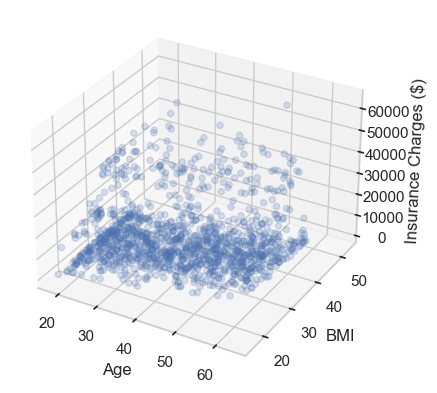

In [204]:
# 3D scatterplot

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = insurance_df['age']
y = insurance_df['bmi']
z = insurance_df['charges']

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Insurance Charges ($)")

ax.scatter(x, y, z, alpha = 0.2)

plt.show()

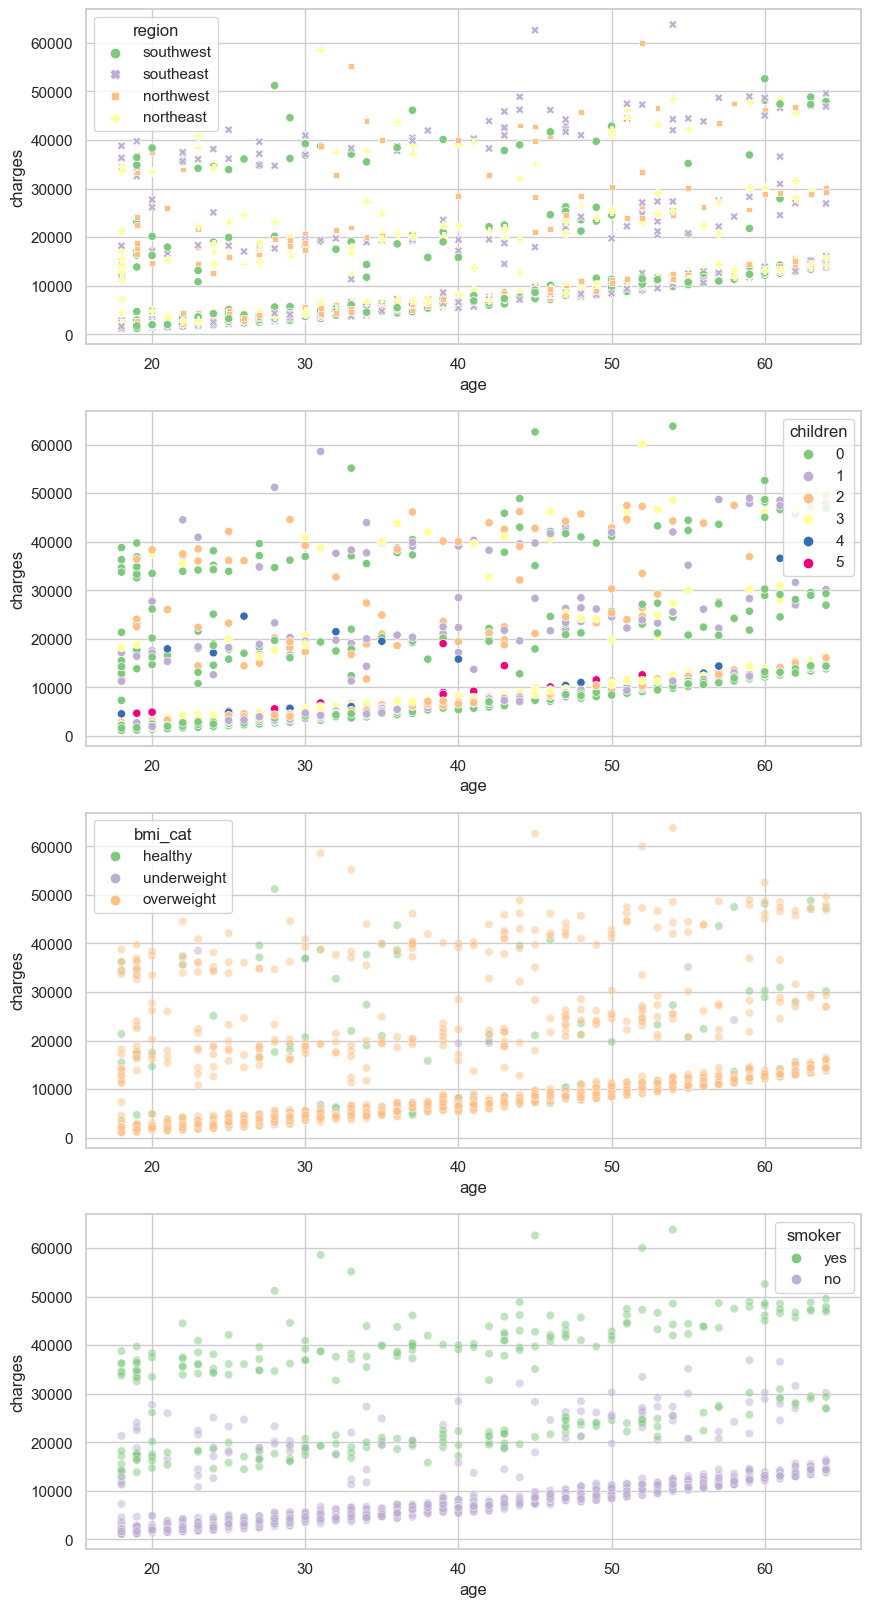

In [205]:
# Visualizing Charges vs Age for # Children, BMI, & Smoking Status


fig, axes = plt.subplots(4, 1, figsize=(10,20), sharey=True)

sns.scatterplot(ax = axes[0], x ='age', y='charges', data=insurance_df, style = 'region', hue = 'region', palette = 'Accent')

sns.scatterplot(ax = axes[1], x ='age', y='charges', data=insurance_df, hue = 'children', palette = 'Accent')

sns.scatterplot(ax = axes[2], x='age', y='charges', data=insurance_df, hue = 'bmi_cat', palette = 'Accent', alpha = 0.5)

sns.scatterplot(ax = axes[3], x='age', y='charges', data=insurance_df, hue = 'smoker', palette = 'Accent', alpha = 0.5)

check_delete('age_bmi_smoke.jpeg')
fig.savefig('age_bmi_smoke.jpeg')

### Exploratory Analysis Conclusions

Upon visualizing the 3 factors of medical insurance charge with the highest correlations, a few trends become evident: firstly, when looking at the charges vs. ages, 3 clusters are immediately apparent. When these points are visualized by the patient's smoking habits, it is clear that those who smoke generally pay more than those who don't; however, the smoking groups have a clear boundary, and it is not represented in the bmi data of the patients. Further investigation could be conducted to determine the validity of this correlation and what other factors might determine this boundary among smokers.

In [210]:
# Checking Exploratory Analysis Conclusions against Multiple Linear Regression

from sklearn.model_selection import train_test_split

insurance_df['smoke_code'] = insurance_df.apply(lambda row: 1 if row['smoker'] =='yes' else 0, axis = 1)

# split data into training & testing datasets
features = ['age','bmi','smoke_code']
x_train, x_test, y_train, y_test = train_test_split(
    insurance_df[features], insurance_df.charges, test_size = 0.2, random_state = 1)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

print("Training R\u00B2 : {}".format(model.score(x_train, y_train)))
print("Testing R\u00B2 : {}".format(model.score(x_test, y_test)))

Training R² : 0.7449386448927938
Testing R² : 0.7567968214396315


In [211]:
import numpy as np
smokes = model.predict(np.array([26, 22, 1]).reshape(1,-1))[0]
doesnt_smoke = model.predict(np.array([26, 22, 0.]).reshape(1,-1))[0]
print("For a 26 year old with a BMI of 22, they are predicted to pay ${} if they smoke and ${} if they do not.".format(
    round(smokes, 2), round(doesnt_smoke, 2)))

For a 26 year old with a BMI of 22, they are predicted to pay $26077.92 if they smoke and $2354.44 if they do not.


/Users/eric/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/eric/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
